In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from __future__ import division
import scipy as sp
from scipy.special import factorial
%matplotlib inline

Sum: 96
prod(factorial): 2282521714753536000L


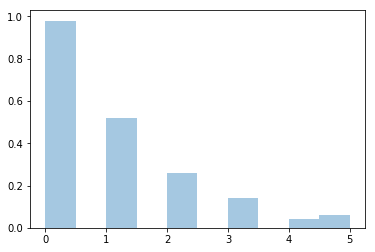

In [6]:
#data = np.random.poisson(1, 100)
data = np.random.geometric(0.5, 100)
data -= 1
sns.distplot(data, kde=False, norm_hist=True)
print("Sum: %d" % data.sum())
print("prod(factorial): %dL" % factorial(data).prod())

In [7]:
def likelihood1(data, theta):
    return (pow(theta, data)/factorial(data)*np.exp(-theta)).prod()

def prior1(theta):
    return np.exp(-theta)

def likelihood2(data, theta):
    return (pow(theta, data)*(1-theta)).prod()

def prior2(theta):
    return 1

In [8]:
def draw_from_posterior1(data):
    N = len(data)
    return np.random.gamma(data.sum()+1, 1/(N+1))

def draw_from_posterior2(data):
    N = len(data)
    return np.random.beta(data.sum()+1, N+1)

In [123]:
def gamma_pdf(x, k, theta):
    return 1/(sp.special.gamma(k)*pow(theta, k))*pow(x, k-1)*np.exp(-x/theta)

def beta_pdf(x, a, b):
    B = sp.special.gamma(a)*sp.special.gamma(b)*sp.special.gamma(a+b)
    return pow(x, a)*pow(1-x, b)/B

???

## Analytical Result

In [125]:
BF = sp.special.gamma(1+data.sum())*sp.special.gamma(100+data.sum()+1+1)/(
    sp.special.gamma(2)*(factorial(data)).prod()
    *sp.special.gamma(100+1)*sp.special.gamma(data.sum()+1)*(100+1)**(1+data.sum()))
print(BF)

nan


/org/groups/chg/weili/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/org/groups/chg/weili/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


## Use inverse

4.03932954741e-54


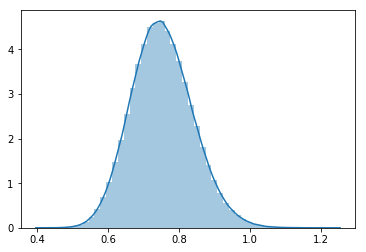

In [174]:
res1 = 0
N1 = 1000000
theta_list1 = []
for i in range(N1):
    theta = draw_from_posterior1(data)
    theta_list1.append(theta)
    res1 += 1/likelihood1(data, theta)
res1 /= N1
print(1/res1)
sns.distplot(theta_list1)

3.17245911261e-53


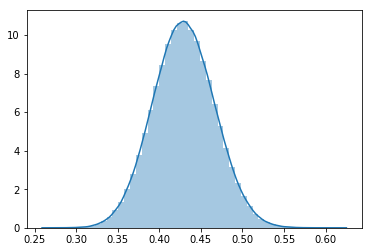

In [175]:
res2 = 0
N2 = 1000000
theta_list2 = []

for i in range(N2):
    theta = draw_from_posterior2(data)
    theta_list2.append(theta)
    res2 += 1/likelihood2(data, theta)
res2 /= N2
print(1/res2)
sns.distplot(theta_list2)

In [176]:
print(1/res1/(1/res1+1/res2))

0.112944259783


## Evaluate at Specific $\theta$

In [156]:
def alpha1(x1, x2, data):
    return min(1, prior1(x2)*likelihood1(data, x2)/prior1(x1)/likelihood1(data, x1))

def alpha2(x1, x2, data):
    return min(1, prior2(x2)*likelihood2(data, x2)/prior2(x1)/likelihood2(data, x1))

In [124]:
def p1(x1, x2, data):
    return alpha1(x1, x2, data)*gamma_pdf(x2, 1, x1)

def p2(x1, x2, data):
    return alpha2(x1, x2, data)

## $M_1$

In [171]:
theta0 = 1
theta1 = np.random.gamma(1, 1)
theta2 = np.random.gamma(1, 1)
N1 = N2 = 1000000
numerator = 0
denominator = 0


for i in range(N1):
    theta1 = draw_from_posterior1(data)
    denominator += p1(theta1, theta0, data)
denominator /= N1

for i in range(N2):
    theta2 = np.random.gamma(1, theta0)
    numerator += alpha1(theta0, theta2, data)
numerator /= N2

res1 = likelihood1(data, theta0)*prior1(theta0)*numerator/denominator

print("f(M|data): %e" % res1)
print("numerator: %e" %numerator)
print("denominator: %e" %denominator)

f(M|data): 2.151073e-54
numerator: 2.444748e-01
denominator: 2.119521e-02


## $M_2$

In [172]:
theta0 = 0.5
theta1 = np.random.beta(1, 1)
theta2 = np.random.beta(1, 1)
N1 = N2 = 1000000
numerator = 0
denominator = 0


for i in range(N1):
    theta1 = draw_from_posterior2(data)
    denominator += p2(theta1, theta0, data)
denominator /= N1

for i in range(N2):
    theta2 = np.random.uniform()
    numerator += alpha2(theta0, theta2, data)
numerator /= N2

res2 = likelihood2(data, theta0)*prior2(theta0)*numerator/denominator

print("f(M|data): %e" % res2)
print("numerator: %e" %numerator)
print("denominator: %e" %denominator)

f(M|data): 1.171216e-53
numerator: 1.733389e-01
denominator: 3.090365e-01


In [173]:
res1 / (res1+res2)

0.1551638796931091

In [184]:
res2/res1

0.12732487335642273

In [185]:
2.151073e-54/1.171216e-53

0.18366151077171075

In [49]:
class ModelSelection:
    def __init__(self, data):
        self.data = data
        self.n = len(data)
        self.datasum = data.sum()
        self.prod_factorial = factorial(data).prod()
        self.proba_MCinv = 0
        
        
    def likelihood1(self, theta):
        return (pow(theta, self.data)/factorial(self.data)*np.exp(-theta)).prod()

    def prior1(self, theta):
        return np.exp(-theta)

    def likelihood2(self, theta):
        return (pow(theta, self.data)*(1-theta)).prod()

    def prior2(self, theta):
        assert theta > 0 and theta < 1
        return 1
    
    def draw_from_posterior1(self):
        return np.random.gamma(self.datasum+1, 1/(self.n+1))

    def draw_from_posterior2(self):
        N = len(data)
        return np.random.beta(self.datasum+1, self.n+1)
    
    #def gamma_pdf(x, k, theta):
    #    return 1/(sp.special.gamma(k)*pow(theta, k))*pow(x, k-1)*np.exp(-x/theta)
    
    def MC_inv(self, N):
        theta_list = np.array([self.draw_from_posterior1() for i in range(N)])
        res1 = 1/np.array([1/self.likelihood1(theta) for theta in theta_list]).mean()
        theta_list = np.array([self.draw_from_posterior2() for i in range(N)])
        res2 = 1/np.array([1/self.likelihood2(theta) for theta in theta_list]).mean()
        self.proba_MCinv = res1/(res2+res1)
        return res1, res2
        
    
    

In [75]:
#data = np.random.poisson(1, 100)
data = np.random.geometric(0.5, 100)
data -= 1
PG = ModelSelection(data)

Sum: 110
prod(factorial): 2271857773302207479808000L


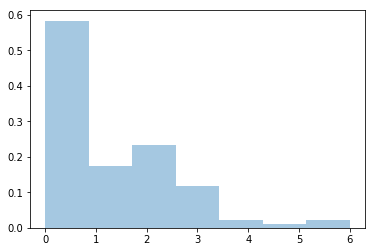

In [76]:
sns.distplot(data, kde=False, norm_hist=True)
print("Sum: %d" % PG.datasum)
print("prod(factorial): %dL" % PG.prod_factorial)

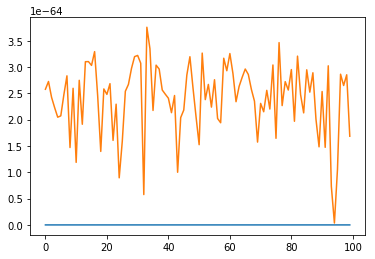

In [77]:
l1 = []
l2 = []
res = []
for i in range(100):
    res1, res2 = PG.MC_inv(1000)
    l1.append(res1)
    l2.append(res2)
    res.append(PG.proba_MCinv)
plt.plot(l1)

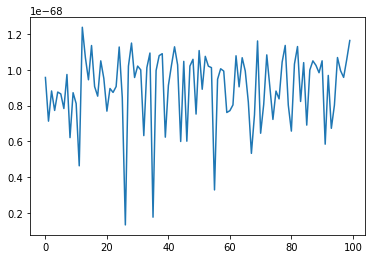

In [85]:
plt.plot(l1)

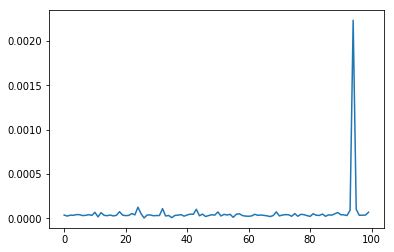

In [79]:
plt.plot(res)

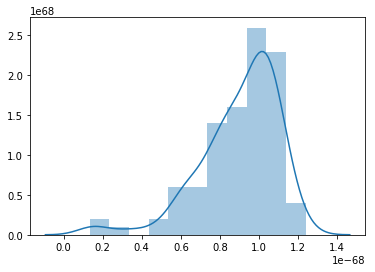

In [80]:
sns.distplot(l1)

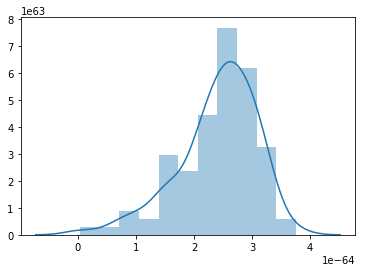

In [81]:
sns.distplot(l2)

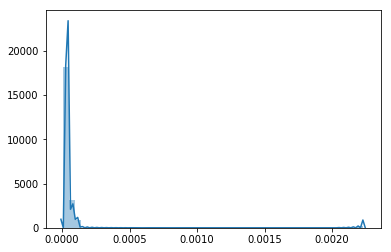

In [82]:
sns.distplot(res)

In [83]:
PG.proba_MCinv

6.9039890046788022e-05

In [84]:
np.mean(l1) / np.mean(l2)

3.735298898615325e-05